In [2]:
import yaml
import netCDF4 as nc
import numpy as np
from utils.read_data import *
from utils.param_alpha import get_alpha, get_complex_alpha, compute_alpha_whole_trajectory,compute_alpha_matrix, get_alpha_averaged, update_alpha_GD
from models.linear_model import u_drift_linear, u_drift_linear_complex, u_drift_linear_matrix
from utils.RK4 import RK4_step, compute_position
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [3]:
with open('configs_2/trace_ISMER_20140629_spot023_drift.yml', 'r') as f:
    config = yaml.safe_load(f)

pos_1, time1 = get_initial_position(config['PATH_DRIFT']) 
print(pos_1,time1)
true_lon, true_lat, true_time = get_true_drift_positions(config['PATH_DRIFT'])

# Get interpolated initial data
u10_interpolation, v10_interpolation = wind_interpolated(config['PATH_WIND'])
water_u_interpolation, water_v_interpolation = water_interpolated(config['PATH_WATER'])

# Compute alpha
#alpha = get_alpha(true_lat,true_lon,true_time,water_u_interpolation, water_v_interpolation,u10_interpolation, v10_interpolation)
#alpha = get_alpha_averaged(true_lat,true_lon,true_time,water_u_interpolation, water_v_interpolation,u10_interpolation, v10_interpolation,2)

#alpha = get_complex_alpha(true_lat,true_lon,true_time,water_u_interpolation, water_v_interpolation,u10_interpolation, v10_interpolation)
#alpha = compute_alpha_matrix(config['PATH_DRIFT'], water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation)
# Compute alpha with the whole trajectory
#alpha = compute_alpha_whole_trajectory(config['PATH_DRIFT'], water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation)
# alpha is a matrix!!

# GRADIENT DESCENT ALPHA
alpha = update_alpha_GD(config['PATH_DRIFT'], water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation,alpha = 0.02, theta = 0.349066,  step=0.1, npoints=3)

print(alpha)
# u_drift function
#u_drift = u_drift_linear(alpha,u10_interpolation, v10_interpolation,water_u_interpolation, water_v_interpolation)
#u_drift = u_drift_linear_complex(alpha,u10_interpolation, v10_interpolation,water_u_interpolation, water_v_interpolation)
u_drift = u_drift_linear_matrix(alpha, u10_interpolation, v10_interpolation,water_u_interpolation,water_v_interpolation)





[-59.99697  48.27826] 127074.06194444445
[[ 0.01693922  0.00614539]
 [-0.00614539  0.01693922]]


In [3]:
len(true_lat)

698

In [4]:
longitudes, latitudes, time_final = compute_position(u_drift, pos_1, time1,1,1000)

In [5]:
ds_water = nc.Dataset(config['PATH_WATER'])
ds_wind = nc.Dataset(config['PATH_WIND'])

lon_water = ds_water.variables['lon']
lon_water = lon_water[:].data
lat_water = ds_water.variables['lat']
lat_water = lat_water[:].data


lon_wind = ds_wind.variables['longitude']
lon_wind = lon_wind[:].data
lat_wind = ds_wind.variables['latitude']
lat_wind = lat_wind[:].data


gridx_water,gridy_water = np.meshgrid(lon_water,lat_water)
gridx_wind,gridy_wind = np.meshgrid(lon_wind,lat_wind)


In [6]:
test_lon = np.arange(-75,-50)
test_lat = np.arange(40,55)

test_mesh_lon, test_meah_lat = np.meshgrid(test_lon,test_lat)

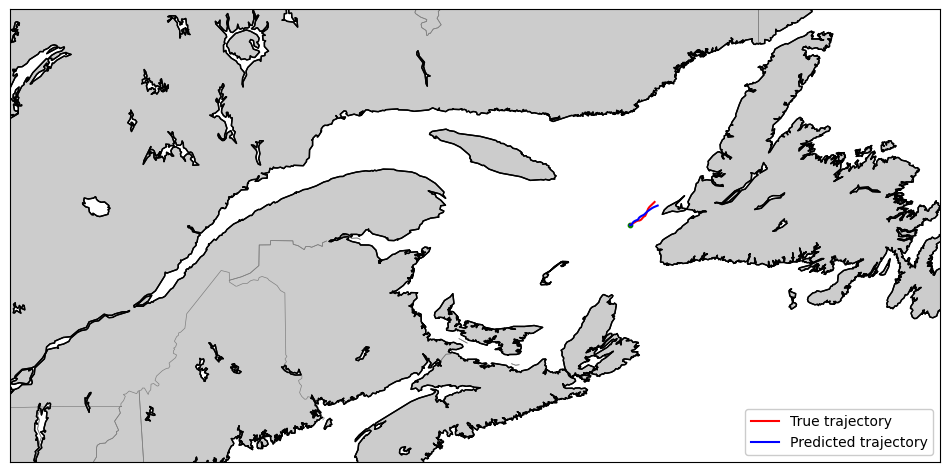

In [7]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()


# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='r', label='True trajectory')
m.scatter(true_lon[0],true_lat[0], latlon=True,s=10,color='g',marker ='o',alpha=1)
m.plot(longitudes,latitudes,latlon=True,linewidth=1.5,color='b', label='Predicted trajectory')

#plot grid ocean
#m.scatter(test_mesh_lon,test_meah_lat,latlon=True,s=10,color='k',marker ='+',alpha=0.5, label='Grid for wind data')

plt.legend(loc = 'lower right',framealpha=1)
plt.show()


In [9]:
test = np.array([[1,3],[2,3],[3,3]])
test

array([[1, 3],
       [2, 3],
       [3, 3]])

In [10]:
np.shape(test)

(3, 2)

In [11]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [4]:
test = np.zeros((2,1))
test[0] = 2
test[1] = 4
print(np.shape(test))
print(test)

(2, 1)
[[2.]
 [4.]]


In [5]:
test[0]

array([2.])

In [9]:
test1 = np.zeros((2,2))


test1[0,0] = 1
test1[1,0] = 2
test1[0,1] = 3
test1[1,1] = 4

test1

array([[1., 3.],
       [2., 4.]])

In [7]:
res = alpha@test1
res

array([17., 23.])